Lindsay Hickman Section C

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 4
Due 11/4/2024 by 5p

### Problem 1
Write a function ```greaterThan(A, lower_lim)``` that takes as an argument a numpy array A and a number lower_lim and returns an array with every entry less than or equal to lower_lim replaced by zero. That is to say, only the numbers strictly greater than lower_lim remain, the rest are 0.

In [1]:
import numpy as np

def greaterThan(A, lower_lim):
    # where allows you to go through every element in the array and check if the condition given is T/F
    # replaces elements when F replaces value with 0
    result = np.where(A > lower_lim, A, 0)
    return result


In [2]:
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
B = np.array([[-1, 1], [2, -2], [0, 3]])
C = np.array([[101.1, 100, 99.9], [99.8, 100.1, 98.9], [103.2, 99, 98]])

assert np.all(greaterThan(A, 5) == np.array([0, 0, 0, 0, 0, 6, 7, 8, 9]))
assert np.all(greaterThan(B, 0) == np.array([[0, 1], [2, 0], [0, 3]]))
assert np.all(greaterThan(C, 100) == np.array([[101.1, 0, 0], [0, 100.1, 0], [103.2, 0, 0]]))

print("You passed all the tests!")

You passed all the tests!


### Problem 2
Write a function ```subtractMean(A)``` that takes as an input the numpy array and returns the array with the mean of all the values subtracted from every element.

In [3]:
import numpy as np

def subtractMean(A):
    #np.mean finds the mean of the array
    mean = np.mean(A)
    #returns array where the mean is subtracted from every element
    return A - mean

If the tests below aren't passing, check the values of A, B, and C. These should be the same as in the test for Problem 1. If the values in these arrays have changed, why might that be?

In [4]:
assert np.isclose(subtractMean(A), np.array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])).all()
assert np.isclose(subtractMean(B), np.array([[-1.5,  0.5],[ 1.5, -2.5],[-0.5,  2.5]])).all()
assert np.isclose(subtractMean(C), np.array([[ 1.1,  0. , -0.1],[-0.2,  0.1, -1.1],[ 3.2, -1. , -2. ]])).all()

print("You passed all the tests!")


You passed all the tests!


### Problem 3

Write a function ```arrayEdges``` that takes as an input an array and returns a 1-D array of all the elements on the edges of the array starting at the upper left corner and working around clockwise. Do not repeat that first element. If the original array is not 2-D, print('Error') and return -1.

*Hint*: Get the shape of the array as height and width, calculate the perimeter (remember not to double count the corners), and make an array of zeros the size of the perimeter. Then fill that array.

*Hint 2*: The length of the shape of a 2-D array is 2.

*Hint 3*: ```dA = A.dtype``` is the data type of A. ```np.zeros().astype(dA)``` creates an array of that type (if A has strings, this will make an array of '0').

In [16]:
import numpy as np

def arrayEdges(A):
    # if array is not 2 D then print error and return -1
    if len(A.shape) != 2:
        print ('Error')
        return -1
    #find the shape of the array
    height, width = A.shape
    #find perimeter of array while not double counting corners
    perimeter = 2*(height+width) -4
    #create an array to fill in with results, that is also the same data type as A
    #perimeter lets you know how many elements the array will contain
    edge = np.zeros(perimeter).astype(A.dtype)
    idx=0
    
    # Store the values from left to right of edge array
    # from the first row of A in the edge array from idx 0 to the width of the array
    edge[idx:idx+width]=A[0,:]
    #updates the idx to be the next idx after the first row
    idx += width

    # Store the values in the right column excluding the first row
    edge[idx:idx+height-1] = A[1:,-1]
    #updates idx to be set to the next element in the array
    idx+=height-1

    # Store the values from the last row, excluding the last element
    edge[idx:idx+width-1] = A[-1, -2::-1]
    idx+=width-1

    #Store values from left column
    edge[idx:]=A[-2:0:-1,0]

    return edge

    

In [17]:
'''Test your code'''

X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Y = np.array([['you', 'got', 'this'],['!','correct','problem']])
Z = np.array(['but','this','wont', 'work'])

assert np.array(arrayEdges(X) == np.array([1, 2, 3, 6, 9, 8, 7, 4])).all()
assert np.array(arrayEdges(Y) == np.array(['you', 'got', 'this', 'problem', 'correct', '!'])).all()
assert arrayEdges(Z) == -1

print("You passed all the tests! (disregard that it says Error above...it's supposed to do that)")


Error
You passed all the tests! (disregard that it says Error above...it's supposed to do that)


## Palmer's Penguins

Below I've imported the Palmer's Penguins dataset, courtesy of Alison Horst's github. Fill in the blanks in Problem 4. You should add code cells below to write code to find the answers.

In [8]:
import pandas as pd

pp_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')
pp_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Problem 4

 1. How many penguins were recorded? 

  - 344

 2. In terms of body mass, how big were the smallest and biggest penguins measured?

  - 2700.0 g
  - 6300.0 g

 3. What species of penguins were recorded and how many of each?

 - Adelie       152
 - Gentoo       124
 -Chinstrap     68

In [9]:
#1
# find number of rows in data frame
len(pp_df)

344

In [10]:
#2
#find the min value within body_mass_g column
minimum = pp_df['body_mass_g'].min()
#find the max value within body_mass_g column
maximum= pp_df['body_mass_g'].max()
minimum


2700.0

In [11]:
maximum

6300.0

In [12]:
#3
#use .value_counts() to count how many rows there are of different species
pp_df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

### Problem 5

Plot a histogram of the body masses of penguins grouped by species. Make sure to include a title, axis labels, and a legend.

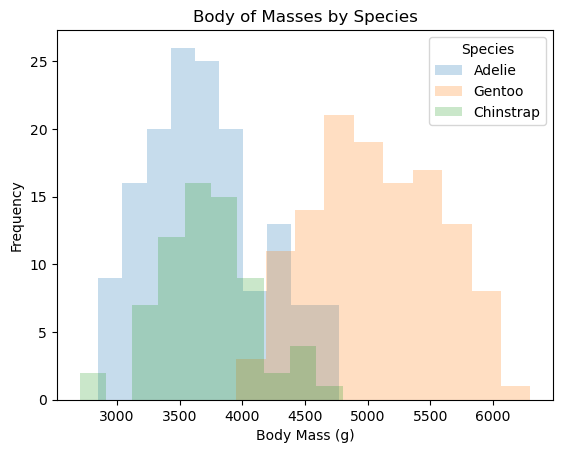

In [13]:

import matplotlib.pyplot as plt
#set title
plt.title('Body of Masses by Species')
#create x label
plt.xlabel('Body Mass (g)')
#create y label
plt.ylabel('Frequency')

#finds data for each unique species
species = pp_df['species'].unique()
#for each othe unique species
for sp in species:
    #creates a subset for each of the different species
    species_subsets = pp_df[pp_df['species'] == sp]
    #make a histogram for the current species
    plt.hist(species_subsets['body_mass_g'], label =sp, alpha = .25)
#create legend
plt.legend(title = 'Species')

### Challenge Problem

Write a function ```interleaveArrays``` that takes as arguments two numpy arrays A and B and return a new numpy array with the rows of A and B interleaved, starting with A. If you run out of rows from one matrix or the other complete the array with the remaining rows of the longer array.

If the two arrays do not have the same number of columns, print('Error: Shapes of arrays are not compatible.') and return -1
If the two arrays contain different data types, print('Error: Types of arrays are not compatible.') and return -2

Example:

```
G = np.array([[1, 2, 3], [4, 5, 6]])
H = np.array([[10, 20, 30], [100, 200, 300], [1000, 2000, 3000]])

interleave(G,H)
```
returns
```
array([[1,2,3], [10,20,30], [4, 5, 6], [100, 200, 300], [1000, 2000, 3000]])
```

In [14]:
import numpy as np

def interleaveArrays(A,B):
    if A.shape[1] != B.shape[1]:
        print('Error: Shapes of arrays are not compatible.')
        return -1
    if A.dtype != B.dtype:
        print('Error: Types of arrays are not compatible.')
        return -2
    # shape returns numebr of rows,columns and we want the number of rows
    rows_A=A.shape[0]
    rows_B=B.shape[0]

    #create empty list
    interleave = []

    # while each interation of the loop is within the max number of rows in rows_A, rows_B
    for iter in range(max(rows_A, rows_B)):
        # if the iteration is less then number of rows in A
        if iter < rows_A:
            #append the iter idx of A to empty list
            interleave.append(A[iter])
        # if the iteration is less then number of rows in B
        if iter <rows_B:
            #append the iter idx of B to empty list
            interleave.append(B[iter])
    #return the new list in the form of an array
    return np.array(interleave)

In [15]:
G = np.array([[1, 2, 3], [4, 5, 6]])
H = np.array([[10, 20, 30], [100, 200, 300], [1000, 2000, 3000]])
interleaveArrays(G,H)

array([[   1,    2,    3],
       [  10,   20,   30],
       [   4,    5,    6],
       [ 100,  200,  300],
       [1000, 2000, 3000]])